In [108]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn
%matplotlib inline
import os
import xgboost as xgb
import seaborn
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support

In [2]:
train=pd.read_csv("/Users/deepakmahapatra/Desktop/WebsiteData/train.tsv",sep="\t")
test=pd.read_csv("/Users/deepakmahapatra/Desktop/WebsiteData/test.tsv",sep="\t")

In [3]:
#train.label.sum()

In [4]:
#train.boilerplate=train.boilerplate.to_string()

In [5]:
train.shape

(7395, 27)

# Before running this run the K means clustering model at the bottom

In [24]:
train.alchemy_category.fillna(value="unknown", inplace=True)
train.alchemy_category.replace(to_replace="?", value="unknown", inplace=True)

In [25]:
train.alchemy_category_score.fillna(value=0,inplace=True)
train.alchemy_category_score.replace(to_replace="?", value=0, inplace=True)

In [26]:
train.is_news.replace(to_replace="?", value=0, inplace=True)

In [27]:
train.news_front_page.replace(to_replace="?", value=0, inplace=True)

In [28]:
train.alchemy_category_score=train.alchemy_category_score.convert_objects(convert_numeric=True)
train.is_news=train.is_news.convert_objects(convert_numeric=True)
train.news_front_page=train.news_front_page.convert_objects(convert_numeric=True)
train_dummies= pd.get_dummies(train, prefix='Category_', columns=['alchemy_category'])

/Users/deepakmahapatra/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
/Users/deepakmahapatra/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app
/Users/deepakmahapatra/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


# The code below should only be used to run the xgboost used here

In [29]:
from sklearn.cross_validation import train_test_split

# Generate the training set.  Set random_state to be able to replicate results.
train1 = train_dummies.sample(frac=0.7, random_state=1)
# Select anything not in the training set and put it in the testing set.
test1 = train_dummies.loc[~train_dummies.index.isin(train1.index)]
# Print the shapes of both sets.
print(train1.shape)
print(test1.shape)

(5177, 40)
(2218, 40)


In [30]:
y=train["label"]

In [31]:
test1.columns

Index([u'url', u'urlid', u'boilerplate', u'alchemy_category_score',
       u'avglinksize', u'commonlinkratio_1', u'commonlinkratio_2',
       u'commonlinkratio_3', u'commonlinkratio_4', u'compression_ratio',
       u'embed_ratio', u'framebased', u'frameTagRatio', u'hasDomainLink',
       u'html_ratio', u'image_ratio', u'is_news', u'lengthyLinkDomain',
       u'linkwordscore', u'news_front_page', u'non_markup_alphanum_characters',
       u'numberOfLinks', u'numwords_in_url', u'parametrizedLinkRatio',
       u'spelling_errors_ratio', u'label', u'K_means_clusters',
       u'Category__arts_entertainment', u'Category__business',
       u'Category__computer_internet', u'Category__culture_politics',
       u'Category__gaming', u'Category__health', u'Category__law_crime',
       u'Category__recreation', u'Category__religion',
       u'Category__science_technology', u'Category__sports',
       u'Category__unknown', u'Category__weather'],
      dtype='object')

In [32]:
label_train=train1.pop("label")
label_test=test1.pop("label")
#print label_train.shape
#print label_test.shape

In [33]:
#test1.drop("label",inplace=True,axis=1)
##train1.drop("label",inplace=True,axis=1)

# Xg Boost model with K means Clustering clusters

In [34]:
#train_dummies.dtypes
train_dummies.drop(["url","urlid","boilerplate"],inplace=True,axis=1)

In [35]:
train1.drop(["url","urlid","boilerplate"],inplace=True,axis=1)
test1.drop(["url","urlid","boilerplate"],inplace=True,axis=1)

/Users/deepakmahapatra/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [36]:
print train1.shape
test1.shape

(5177, 36)


(2218, 36)

In [37]:
dtrain = xgb.DMatrix( train1, label=label_train)
dtest= xgb.DMatrix(test1,label=label_test)

In [38]:
train1.head(2)

,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,...,Category__culture_politics,Category__gaming,Category__health,Category__law_crime,Category__recreation,Category__religion,Category__science_technology,Category__sports,Category__unknown,Category__weather
573,0.884752,2.215827,0.590278,0.229167,0.131944,0.076389,0.457006,0,0,0.018711,...,0,0,0,0,0,0,0,0,0,0
4146,0.000000,2.085366,0.516484,0.241758,0.131868,0.076923,21.000000,-1,0,0.081633,...,0,0,0,0,0,0,0,0,1,0


In [39]:
param = {'bst:max_depth':10, 'bst:eta':0.5, 'silent':1, 'objective':'binary:logistic' }
param['nthread'] = 4
param['eval_metric'] = 'auc'

In [40]:
evallist  = [(dtest,'eval'), (dtrain,'train')]


In [41]:
num_round = 10
bst = xgb.train( param, dtrain, num_round, evallist )

[0]	eval-auc:0.788498	train-auc:0.840769
[1]	eval-auc:0.804035	train-auc:0.855979
[2]	eval-auc:0.806881	train-auc:0.870644
[3]	eval-auc:0.810353	train-auc:0.879611
[4]	eval-auc:0.812231	train-auc:0.886589
[5]	eval-auc:0.810620	train-auc:0.894919
[6]	eval-auc:0.813455	train-auc:0.896531
[7]	eval-auc:0.817042	train-auc:0.901871
[8]	eval-auc:0.816804	train-auc:0.906122
[9]	eval-auc:0.816606	train-auc:0.914339


In [42]:
ypredKmeans = bst.predict(dtest)

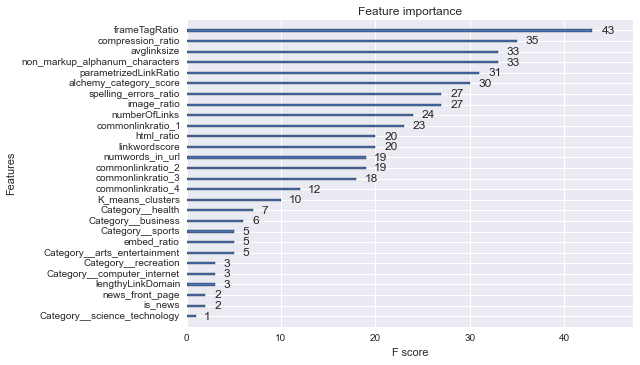

In [43]:
xgb.plot_importance(bst)

In [45]:
import copy

In [46]:
#predictions = [round(value) for value in ypredKmeans]
ypredKMXG = copy.deepcopy(ypredKmeans)
ypredKmeans[ypredKmeans>0.7] = 1    
ypredKmeans[ypredKmeans<=0.7] = 0 

ypredKmeans

array([ 0.,  0.,  0., ...,  0.,  0.,  0.], dtype=float32)

In [109]:
print sklearn.metrics.accuracy_score(label_test, ypredKmeans, normalize=True, sample_weight=None)
print "XgKM", precision_recall_fscore_support(label_test, ypredKmeans,average='weighted')

0.748422001803
XgKM (0.79471333856153004, 0.74842200180342655, 0.73895703236318722, None)


In [48]:
cm=sklearn.metrics.confusion_matrix(label_test, ypredKmeans)

In [49]:
from sklearn import metrics
fpr_xg, tpr_xg, thresholds = sklearn.metrics.roc_curve(label_test, ypredKMXG, pos_label=1)
auc = sklearn.metrics.auc(fpr_xg,tpr_xg)

#fpr_xg, tpr_xg, _ = sklearn.metrics.roc_curve(label_test, ypredKmeans)

In [50]:
auc

0.81660583941605847

In [51]:
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

In [52]:
print TP,FP,FN,TN

1035 61 497 625


In [55]:
sum(ypredKmeans)

686.0

In [56]:
precision=(float(TP)/float(TP+FP))
print precision

0.944343065693


In [57]:
Recall=(float(TP)/float(TP+FN))

In [58]:
Recall

0.6755874673629243

In [59]:
Accuracy=(float(TP+TN)/float(TP+FP+TN+FN))

In [60]:
Accuracy

0.7484220018034266

In [61]:
corr=train_dummies.corr()

/Users/deepakmahapatra/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


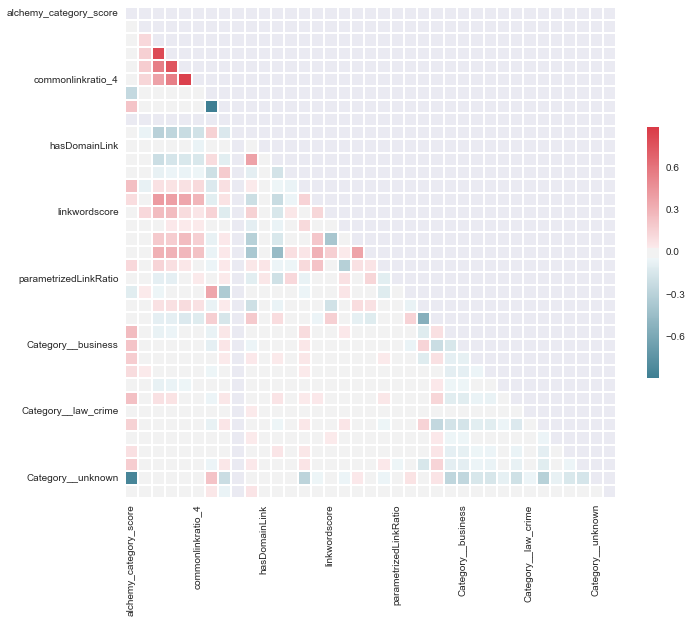

In [62]:
f, ax = plt.subplots(figsize=(11, 9))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap
cmap = seaborn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
seaborn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

# Try the Neural Network Method

In [ ]:
#from sklearn.neural_network import MLPClassifier

In [ ]:
#clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

In [ ]:
#clf.fit(train1,label_train )

In [ ]:
#Neural_pred=clf.predict(test1)

In [ ]:
"""print sklearn.metrics.accuracy_score(label_test, Neural_pred, normalize=True, sample_weight=None)
cm_Neural=sklearn.metrics.confusion_matrix(label_test, Neural_pred)
TP_Neural = cm_Neural[0][0]
FP_Neural = cm_Neural[0][1]
FN_Neural = cm_Neural[1][0]
TN_Neural = cm_Neural[1][1]
print TP_Neural,FP_Neural,FN_Neural,TN_Neural
precision_Neural=(float(TP_Neural)/float(TP_Neural+FP_Neural))
print precision_Neural
Recall_Neural=(float(TP_Neural)/float(TP_Neural+FN_Neural))"""

# TFIDF vectorizer

In [3]:
text_docs = train.boilerplate

In [4]:
import nltk
from nltk.corpus import stopwords # stop words
from nltk.tokenize import wordpunct_tokenize,word_tokenize # splits sentences into words
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.stem.lancaster import LancasterStemmer # extract the roots of words 
from nltk.stem.porter import PorterStemmer # extract the roots of words 
import re
import lda
from copy import deepcopy



In [5]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [6]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [207]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, max_features=200000,min_df=0.1,
                                  stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem)

%time tfidf_matrix = tfidf_vectorizer.fit_transform(text_docs) #fit the vectorizer to synopses


CPU times: user 2min, sys: 1.37 s, total: 2min 1s
Wall time: 2min 3s


# K means clustering on the tfidf matrix

In [208]:

print(tfidf_matrix.shape)

(7395, 191)


In [209]:
from sklearn.cluster import KMeans

num_clusters = 2

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

CPU times: user 11.1 s, sys: 31.2 ms, total: 11.1 s
Wall time: 11.1 s


In [210]:
from sklearn.externals import joblib

#uncomment the below to save your model 
#since I've already run my model I am loading from the pickle

joblib.dump(km,  'doc_cluster.pkl')

km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()

In [211]:
train["K_means_clusters"]=clusters

In [212]:
train.shape

(7395, 28)

# LDA not useful in our case and have not been studied

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

In [14]:

n_features = 1000
n_topics = 2
n_top_words = 20
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,max_features=n_features,stop_words='english')
tf = tf_vectorizer.fit_transform(KMeans_docs)

NameError: name 'KMeans_docs' is not defined

In [34]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [35]:
lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

lda.fit(tf)


print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model:
Topic #0:
com new like just people time world news 10 2011 health sports said http best year fashion www video 2010
Topic #1:
recipe cup make food chocolate minutes add recipes butter just sugar like cream cheese time water baking cake use salt
()


# Principal Component Analysis or TruncatedSVD

Dimensionality reduction using truncated SVD (aka LSA).
This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means it can work with scipy.sparse matrices efficiently.
In particular, truncated SVD works on term count/tf-idf matrices as returned by the vectorizers in sklearn.feature_extraction.text. In that context, it is known as latent semantic analysis (LSA).
This estimator supports two algorithms: a fast randomized SVD solver, and a “naive” algorithm that uses ARPACK as an eigensolver on (X * X.T) or (X.T * X), whichever is more efficient.


In [213]:
"""from sklearn import decomposition
#Assumed you have training and test data set as train and test
# Create PCA obeject 
pca= decomposition.PCA(n_components=1) #default value of k =min(n_sample, n_features)
# For Factor analysis
#fa= decomposition.FactorAnalysis()
# Reduced the dimension of training dataset using PCA
from sklearn.preprocessing import normalize
#normalized=normalize(data, norm='l2', axis=1, copy=True)

reduced = pca.fit_transform(tfidf_matrix)

print(pca.explained_variance_ratio_)
"""
##PCA is not useful in reducing sparse matrix 

"from sklearn import decomposition\n#Assumed you have training and test data set as train and test\n# Create PCA obeject \npca= decomposition.PCA(n_components=1) #default value of k =min(n_sample, n_features)\n# For Factor analysis\n#fa= decomposition.FactorAnalysis()\n# Reduced the dimension of training dataset using PCA\nfrom sklearn.preprocessing import normalize\n#normalized=normalize(data, norm='l2', axis=1, copy=True)\n\nreduced = pca.fit_transform(tfidf_matrix)\n\nprint(pca.explained_variance_ratio_)\n"

In [214]:
#from sklearn.decomposition import SparsePCA
#SparsePCA=SparsePCA(n_components=None, alpha=1, ridge_alpha=0.01, max_iter=1000, tol=1e-08, method='lars', n_jobs=1, U_init=None, V_init=None, verbose=False, random_state=None)

In [215]:
#SparsePCAData=SparsePCA.fit_transform(tfidf_matrix)

In [216]:
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix
variance_list=[]
for i in range(191):
    svd = TruncatedSVD(n_components=i, n_iter=7, random_state=42)
    svd.fit(tfidf_matrix) 
    #print(svd.explained_variance_ratio_)
    #print(svd.explained_variance_ratio_.sum())
    variance_list.append(svd.explained_variance_ratio_.sum()*100)

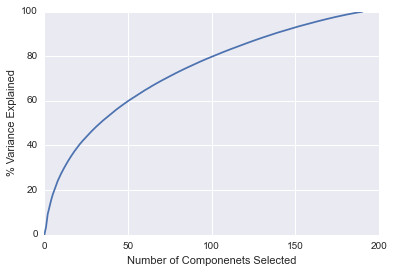

In [217]:
import matplotlib.pyplot as plt
plt.plot(variance_list)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Componenets Selected')
plt.show()

In [220]:
selected_svd=TruncatedSVD(n_components=50, n_iter=7, random_state=42)
#

In [221]:
SVD_data=selected_svd.fit_transform(tfidf_matrix)

In [222]:
SVD_data=pd.DataFrame(SVD_data)

In [223]:
SVD_data.shape

(7395, 50)

In [224]:
train_SVD=SVD_data.merge(train_dummies,left_index=True,right_index=True)

In [225]:
train_SVD.shape

(7395, 87)

In [226]:
train_SVD.drop(["K_means_clusters"],inplace=True,axis=1)

In [227]:
from sklearn.cross_validation import train_test_split

# Generate the training set.  Set random_state to be able to replicate results.
train1_SVD = train_SVD.sample(frac=0.7, random_state=1)
# Select anything not in the training set and put it in the testing set.
test1_SVD = train_SVD.loc[~train_dummies.index.isin(train1.index)]
# Print the shapes of both sets.
print(train1_SVD.shape)
print(test1_SVD.shape)

(5177, 86)
(2218, 86)


In [228]:
train_SVD.columns

Index([                                0,                                 1,
                                       2,                                 3,
                                       4,                                 5,
                                       6,                                 7,
                                       8,                                 9,
                                      10,                                11,
                                      12,                                13,
                                      14,                                15,
                                      16,                                17,
                                      18,                                19,
                                      20,                                21,
                                      22,                                23,
                                      24,                                25,

In [229]:
label_train_SVD=train1_SVD.pop("label")
label_test_SVD=test1_SVD.pop("label")
#print label_train.shape
#print label_test.shape

In [230]:
#train1_SVD.drop(["url","urlid","boilerplate"],inplace=True,axis=1)
#test1_SVD.drop(["url","urlid","boilerplate"],inplace=True,axis=1)
dtrain_SVD = xgb.DMatrix( train1_SVD, label=label_train_SVD)
dtest_SVD= xgb.DMatrix(test1_SVD,label=label_test_SVD)


In [231]:
print train1_SVD.shape
print test1_SVD.shape

(5177, 85)
(2218, 85)


In [232]:
param = {'bst:max_depth':10, 'bst:eta':0.5, 'silent':1, 'objective':'binary:logistic' }
param['nthread'] = 4
param['eval_metric'] = 'auc'
evallist  = [(dtest_SVD,'eval'), (dtrain_SVD,'train')]


In [233]:
num_round = 10
bstSVD = xgb.train( param, dtrain_SVD, num_round, evallist )

[0]	eval-auc:0.848197	train-auc:0.881541
[1]	eval-auc:0.850978	train-auc:0.899340
[2]	eval-auc:0.852847	train-auc:0.909811
[3]	eval-auc:0.854719	train-auc:0.915689
[4]	eval-auc:0.858107	train-auc:0.924099
[5]	eval-auc:0.858977	train-auc:0.930889
[6]	eval-auc:0.860960	train-auc:0.938415
[7]	eval-auc:0.860234	train-auc:0.943870
[8]	eval-auc:0.860717	train-auc:0.946594
[9]	eval-auc:0.859796	train-auc:0.952120


In [234]:
ypredSVD = bstSVD.predict(dtest_SVD)

In [235]:
import copy
yprobSVD = copy.deepcopy(ypredSVD)

In [236]:

ypredSVD[ypredSVD>0.7] = 1    
ypredSVD[ypredSVD<=0.7] = 0 

ypredSVD

array([ 0.,  0.,  0., ...,  1.,  0.,  0.], dtype=float32)

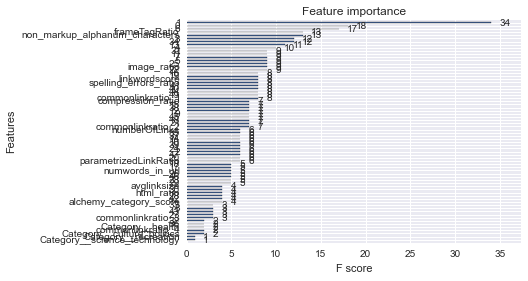

In [237]:
xgb.plot_importance(bstSVD)

In [238]:
#predictionsSVD = [round(value) for value in ypredSVD]
#ypredSVD= [lambda x:1 if x>0.7  else 0 for x in ypredSVD]
        
#ypredSVD

In [239]:
cmXGSVD=sklearn.metrics.confusion_matrix(label_test, ypredKmeans)

In [240]:
from sklearn import metrics
fprPCA, tprPCA, thresholdsPCA = sklearn.metrics.roc_curve(label_test_SVD, yprobSVD, pos_label=1)
aucPCA = sklearn.metrics.auc(fprPCA,tprPCA)
print aucPCA

0.859796440142


In [241]:
TPXGSVD = cmXGSVD[0][0]
FPXGSVD = cmXGSVD[0][1]
FNXGSVD = cmXGSVD[1][0]
TNXGSVD = cmXGSVD[1][1]


In [267]:
print TPXGSVD ,FPXGSVD,FNXGSVD,TNXGSVD
print sklearn.metrics.accuracy_score(label_test, ypredSVD, normalize=True, sample_weight=None)

1035 61 497 625
0.783137962128


In [243]:
print sklearn.metrics.accuracy_score(label_test_SVD, ypredSVD, normalize=True, sample_weight=None)
print "XgSVD", precision_recall_fscore_support(label_test_SVD, ypredSVD,average='weighted')

0.783137962128
XgSVD (0.80859067113792116, 0.78313796212804332, 0.7790556578743707, None)


In [244]:

#fpr_grd, tpr_grd, _ = sklearn.metrics.roc_curve(label_test_SVD, ypredSVD)


# The random forest model by itself


# ROC Curve

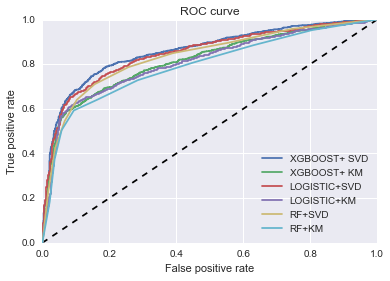

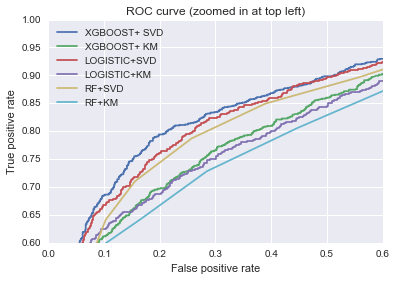

In [266]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fprPCA,tprPCA,label="XGBOOST+ SVD")
plt.plot(fpr_xg, tpr_xg, label='XGBOOST+ KM')
plt.plot(fprLRSVD, tprLRSVD, label='LOGISTIC+SVD')
plt.plot(fprLRKM, tprLRKM, label='LOGISTIC+KM')
plt.plot(fprRFSVD, tprRFSVD, label='RF+SVD')
plt.plot(fprRFKM, tprRFKM, label='RF+KM')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

plt.figure(2)
plt.xlim(0, 0.6)
plt.ylim(0.6, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fprPCA,tprPCA,label="XGBOOST+ SVD")
plt.plot(fpr_xg, tpr_xg, label='XGBOOST+ KM')
plt.plot(fprLRSVD, tprLRSVD, label='LOGISTIC+SVD')
plt.plot(fprLRKM, tprLRKM, label='LOGISTIC+KM')
plt.plot(fprRFSVD, tprRFSVD, label='RF+SVD')
plt.plot(fprRFKM, tprRFKM, label='RF+KM')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()


# Bayes

In [246]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
counts = count_vectorizer.fit_transform(train.boilerplate.values)

In [247]:
print counts.shape
print y.shape

(7395, 91592)
(5177,)


In [248]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
targets = y
classifier.fit(counts, targets)

ValueError: Found input variables with inconsistent numbers of samples: [7395, 5177]

In [ ]:
#test_counts = count_vectorizer.transform(test1.boilerplate)
clustetr_naive = classifier.predict(counts)
clustetr_naive

In [ ]:
train["clustetr_naive"]=clusters

In [ ]:
#train[train["clustetr_naive"]==1]

# Logistic Regression model

In [249]:
import sklearn.linear_model as lm

In [250]:
rdSVD = lm.LogisticRegression(class_weight="balanced", random_state=None)
rdSVD.fit(train1_SVD,label_train_SVD)
LRSVD_predictions=rdSVD.predict(test1_SVD)
LRSVD_prob=rdSVD.predict_proba(test1_SVD)[:,1]


rdKM = lm.LogisticRegression(class_weight="balanced", random_state=None)
rdKM.fit(train1,label_train)
LRKM_predictions=rdKM.predict(test1)
LRKM_prob=rdKM.predict_proba(test1)[:,1]
LRKM_prob.shape

(2218,)

In [251]:
LRSVD_prob.shape

(2218,)

In [252]:
cmLRKM=sklearn.metrics.confusion_matrix(label_test, LRKM_predictions)
cmLRSVD=sklearn.metrics.confusion_matrix(label_test, LRSVD_predictions)

In [253]:
print sklearn.metrics.accuracy_score(label_test, LRKM_predictions, normalize=True, sample_weight=None)
print sklearn.metrics.accuracy_score(label_test, LRSVD_predictions, normalize=True, sample_weight=None)
print "LRKM", precision_recall_fscore_support(label_test, LRKM_predictions,average='weighted')
print "LRSVD", precision_recall_fscore_support(label_test, LRSVD_predictions,average='weighted')

0.759693417493
0.78088367899
LRKM (0.78163158175424996, 0.75969341749323716, 0.75546990913087386, None)
LRSVD (0.78322390783392715, 0.78088367899008115, 0.78058407078461378, None)


In [254]:
from sklearn.metrics import roc_auc_score
roc_auc_score(label_test, LRKM_predictions)

0.76127255812743144

In [255]:
TPLRSVD = cmLRSVD[0][0]
FPLRSVD =cmLRSVD[0][1]
FNLRSVD = cmLRSVD[1][0]
TNLRSVD = cmLRSVD[1][1]

print TPLRSVD,FPLRSVD,FNLRSVD,TNLRSVD



901 195 291 831


In [256]:
TPLRKM = cmLRKM[0][0]
FPLRKM =cmLRKM[0][1]
FNLRKM= cmLRKM[1][0]
TNLRKM = cmLRKM[1][1]

print TPLRKM,FPLRKM,FNLRKM,TNLRKM



982 114 419 703


In [257]:
fprLRSVD, tprLRSVD, thresholdsLRSVD = sklearn.metrics.roc_curve(label_test_SVD, LRSVD_prob, pos_label=1)
aucLRSVD = sklearn.metrics.auc(fprLRSVD,tprLRSVD)

print aucLRSVD

fprLRKM, tprLRKM, thresholdsLRKM = sklearn.metrics.roc_curve(label_test_SVD, LRKM_prob, pos_label=1)
aucLRKM = sklearn.metrics.auc(fprLRKM,tprLRKM)
print aucLRKM

0.84866537856
0.808709681617


In [258]:
from sklearn.model_selection import learning_curve


train_sizes, train_scores, valid_scores = learning_curve(rd, train1,label_train, train_sizes=[50, 80, 110], cv=5)

#train_scores           

#valid_scores           


NameError: name 'rd' is not defined

# Random Forest

In [259]:
from sklearn.ensemble import RandomForestClassifier
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create Random Forest object
model_RF_SVD= RandomForestClassifier(criterion="entropy")
# Train the model using the training sets and check score
model_RF_SVD.fit(train1_SVD,label_train_SVD)
#Predict Output
predicted_randomforest_SVD= model_RF_SVD.predict(test1_SVD)
RF_prob_SVD=model_RF_SVD.predict_proba(test1_SVD)[:,1]
RF_prob_SVD.shape

model_RF_Kmeans=RandomForestClassifier(criterion="entropy")
model_RF_Kmeans.fit(train1,label_train)
predicted_randomforest_KM= model_RF_Kmeans.predict(test1)
RF_prob_KM=model_RF_Kmeans.predict_proba(test1)[:,1]
RF_prob_KM.shape

(2218,)

In [260]:
print sklearn.metrics.accuracy_score(label_test, predicted_randomforest_SVD, normalize=True, sample_weight=None)
from sklearn.metrics import roc_auc_score
roc_auc_score(label_test_SVD, predicted_randomforest_SVD)
fprRFSVD, tprRFSVD, thresholdsLRSVD = sklearn.metrics.roc_curve(label_test_SVD, RF_prob_SVD, pos_label=1)
aucRFSVD = sklearn.metrics.auc(fprRFSVD,tprRFSVD)
print precision_recall_fscore_support(label_test, predicted_randomforest_SVD,average='weighted')
print "AUc",aucRFSVD
print sklearn.metrics.accuracy_score(label_test, predicted_randomforest_KM, normalize=True, sample_weight=None)
fprRFKM, tprRFKM, thresholdsLRKM = sklearn.metrics.roc_curve(label_test_SVD, RF_prob_KM, pos_label=1)
aucRFKM = sklearn.metrics.auc(fprRFKM,tprRFKM)
print "Auc",aucRFKM
from sklearn.metrics import precision_recall_fscore_support
print precision_recall_fscore_support(label_test, predicted_randomforest_KM,average='weighted')

0.776375112714
(0.78216206246413633, 0.77637511271415693, 0.7754760778552342, None)
AUc 0.834114410529
0.737150586114
Auc 0.791479224404
(0.74754807590389416, 0.73715058611361584, 0.73483009081259598, None)


In [261]:
cmRFKM=sklearn.metrics.confusion_matrix(label_test, predicted_randomforest_KM)
cmRFSVD=sklearn.metrics.confusion_matrix(label_test, predicted_randomforest_SVD)

In [262]:
TPRFKM = cmRFKM[0][0]
FPRFKM =cmRFKM[0][1]
FNRFKM= cmRFKM[1][0]
TNRFKM = cmRFKM[1][1]

print TPRFKM,FPRFKM,FNRFKM,TNRFKM

TPRFSVD = cmRFSVD[0][0]
FPRFSVD =cmRFSVD[0][1]
FNRFSVD= cmRFSVD[1][0]
TNRFSVD = cmRFSVD[1][1]

print TPRFSVD,FPRFSVD,FNRFSVD,TNRFSVD



915 181 402 720
925 171 325 797


In [263]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


In [264]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [265]:

X, y = train1,label_train

title = "Learning Curves (Logistic Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = rd
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

#title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:

plt.show()

NameError: name 'rd' is not defined

## Testing how many components to select

In [202]:
param = {'bst:max_depth':10, 'bst:eta':0.5, 'silent':1, 'objective':'binary:logistic' }
param['nthread'] = 4
param['eval_metric'] = 'auc'
evallist  = [(dtest_SVD,'eval'), (dtrain_SVD,'train')]
num_round = 10
fpr_i=[]
tpr_i=[]
from sklearn.decomposition import TruncatedSVD
from sklearn.cross_validation import train_test_split
from sklearn.random_projection import sparse_random_matrix
variance_list=[]
for i in range(43):
    svd = TruncatedSVD(n_components=i, n_iter=7, random_state=42)
    #svd.fit(tfidf_matrix) 
    #print(svd.explained_variance_ratio_)
    #print(svd.explained_variance_ratio_.sum())
    #variance_list.append(svd.explained_variance_ratio_.sum()*100)
    SVD_data=selected_svd.fit_transform(tfidf_matrix)
    SVD_data=pd.DataFrame(SVD_data)
    train_SVD=SVD_data.merge(train_dummies,left_index=True,right_index=True)
    

    # Generate the training set.  Set random_state to be able to replicate results.
    train1_SVD = train_SVD.sample(frac=0.7, random_state=1)
    # Select anything not in the training set and put it in the testing set.
    test1_SVD = train_SVD.loc[~train_dummies.index.isin(train1.index)]
    # Print the shapes of both sets.
    label_train_SVD=train1_SVD.pop("label")
    label_test_SVD=test1_SVD.pop("label")
    dtrain_SVD = xgb.DMatrix( train1_SVD, label=label_train_SVD)
    dtest_SVD= xgb.DMatrix(test1_SVD,label=label_test_SVD)
   
    bstSVD = xgb.train( param, dtrain_SVD, num_round, evallist )
    predictionsSVD = bstSVD.predict(dtest_SVD)
    #predictionsSVD = [round(value) for value in ypred]
    globals()['fpr%s' % i] , globals()['tpr%s' % i], _ = sklearn.metrics.roc_curve(label_test_SVD, predictionsSVD)

[0]	eval-auc:0.814247	train-auc:0.858447
[1]	eval-auc:0.829534	train-auc:0.878884
[2]	eval-auc:0.834133	train-auc:0.892555
[3]	eval-auc:0.832404	train-auc:0.899798
[4]	eval-auc:0.831532	train-auc:0.909527
[5]	eval-auc:0.833093	train-auc:0.916527
[6]	eval-auc:0.835915	train-auc:0.922811
[7]	eval-auc:0.835681	train-auc:0.927004
[8]	eval-auc:0.835953	train-auc:0.930685
[9]	eval-auc:0.835834	train-auc:0.934572
[0]	eval-auc:0.814247	train-auc:0.858447
[1]	eval-auc:0.829534	train-auc:0.878884
[2]	eval-auc:0.834133	train-auc:0.892555
[3]	eval-auc:0.832404	train-auc:0.899798
[4]	eval-auc:0.831532	train-auc:0.909527
[5]	eval-auc:0.833093	train-auc:0.916527
[6]	eval-auc:0.835915	train-auc:0.922811
[7]	eval-auc:0.835681	train-auc:0.927004
[8]	eval-auc:0.835953	train-auc:0.930685
[9]	eval-auc:0.835834	train-auc:0.934572
[0]	eval-auc:0.814247	train-auc:0.858447
[1]	eval-auc:0.829534	train-auc:0.878884
[2]	eval-auc:0.834133	train-auc:0.892555
[3]	eval-auc:0.832404	train-auc:0.899798
[4]	eval-auc:0.8

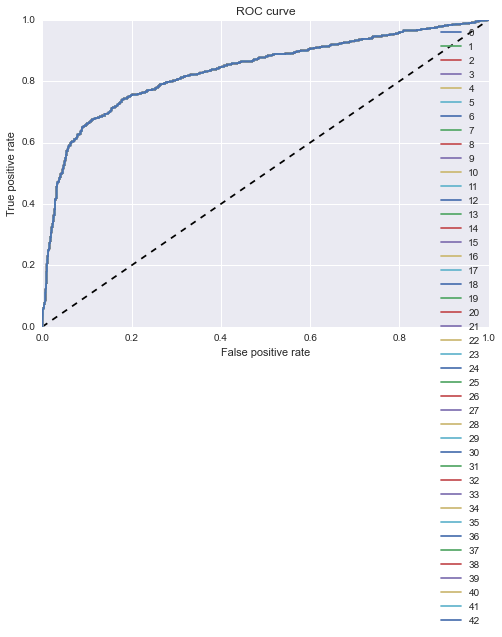

In [203]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
for i in range(43):
    plt.plot(globals()['fpr%s' % i] , globals()['tpr%s' % i],label=i)
#plt.plot(fpr_i.get("2"),tpr_grd("2"),label=i)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()